# IRISデータの標準化


In [1]:
from sklearn import datasets
import matplotlib.pyplot as plt
import numpy as np
import seaborn
iris = datasets.load_iris()

In [2]:
target = iris.target
X = iris.data[:, 2:4]
petal_len = X[:, 0]
petal_width = X[:, 1]

In [3]:
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.xlim(petal_len.min(), petal_len.max())
plt.ylim(petal_width.min(), petal_width.max())


(0.10000000000000001, 2.5)

平均値 μ=(3.758667, 1.198667)
共分散行列 Σ=
[[ 3.11317942  1.29638747]
 [ 1.29638747  0.58241432]]


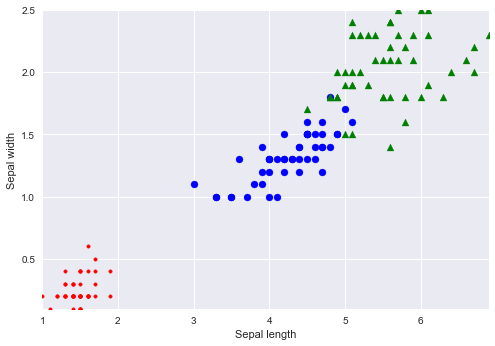

In [4]:
# 標準の状態
mean = (petal_len.mean(), petal_width.mean())
cov = np.cov([petal_len, petal_width])

print("平均値 μ=(%f, %f)" % (mean[0], mean[1]))
print("共分散行列 Σ=\n%s" % str(cov))

# 標準の状態のplot
plt.scatter(petal_len[0:49], petal_width[0:49], c='red', marker='.')
plt.scatter(petal_len[50:99], petal_width[50:99], c='blue', marker='o')
plt.scatter(petal_len[100:149], petal_width[100:149], c='green', marker='^')
plt.show()

## 4.1.2 観測データの標準化
標準化とは、個々の特徴を平均0、分散1にすること。

